# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 61.7 MB/s eta 0:00:01    |███████████▉                    | 7.1 MB 61.7 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 54.8 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 1.4 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 73.0 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 61.1 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 63.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 1.2 MB/s  eta 0:00:01
     |████████████████████

## Imports

In [6]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pip install torch torchvision matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install ipywidgets
!pip install --upgrade ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 9.2 MB/s eta 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.7
    Uninstalling widgetsnbextension-3.6.7:
      Successfully uninstalled widgetsnbextension-3.6.7
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0


In [1]:
%%bash
jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and create training set
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)

# Create training dataloader
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

# Download and create test set
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Create test dataloader
test_loader = DataLoader(test_data, batch_size=32)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


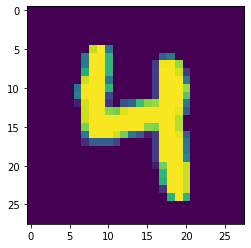

2


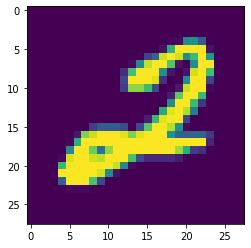

8


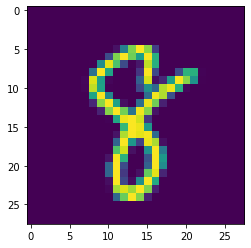

0


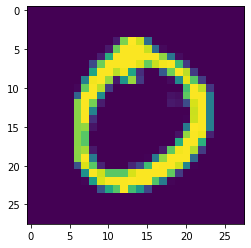

1


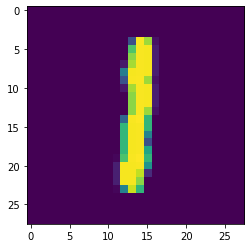

7


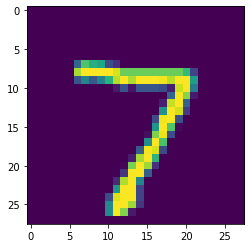

2


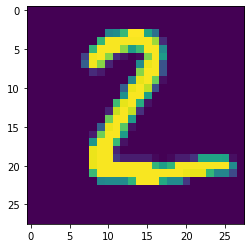

1


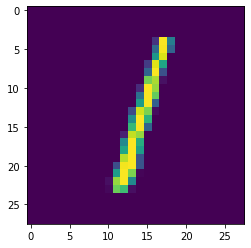

0


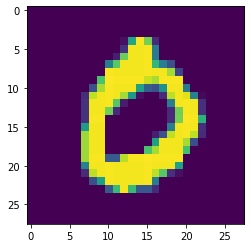

4


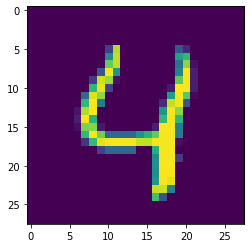

(None, None)

In [8]:
show5(train_loader) , show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28*28 pixels) to hidden layer
        self.fc2 = nn.Linear(128, 64)       # Hidden layer to another hidden layer
        self.fc3 = nn.Linear(64, 10)        # Hidden layer to output layer (10 classes for MNIST)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SimpleNN()

# Print the model architecture
print(model)


SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
import torch.optim as optim

# Instantiate the model
model = SimpleNN()

# Specify the loss function
criterion = nn.CrossEntropyLoss()

# Specify the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print the loss function and optimizer
print(criterion)
print(optimizer)


CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    maximize: False
    weight_decay: 0
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
import torch

# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Move model to the appropriate device
model.to(device)

# Training the model
num_epochs = 10  # Number of epochs
train_losses = []  # To store the average loss for each epoch

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Move data to the appropriate device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        
        # Compute the loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate the running loss
        running_loss += loss.item()
        
        # Print the loss every 250 batches
        if batch_idx % 250 == 249:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    # Calculate and record the average loss for this epoch
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')

# Print the training losses
print("Training complete. Average losses per epoch:")
for epoch, loss in enumerate(train_losses, 1):
    print(f'Epoch {epoch}: {loss:.4f}')


Using device: cuda
Epoch [1/10], Batch [250/1875], Loss: 0.4694
Epoch [1/10], Batch [500/1875], Loss: 0.4085
Epoch [1/10], Batch [750/1875], Loss: 0.1084
Epoch [1/10], Batch [1000/1875], Loss: 0.5370
Epoch [1/10], Batch [1250/1875], Loss: 0.0477
Epoch [1/10], Batch [1500/1875], Loss: 0.1066
Epoch [1/10], Batch [1750/1875], Loss: 0.0754
Epoch [1/10], Average Loss: 0.3553
Epoch [2/10], Batch [250/1875], Loss: 0.1763
Epoch [2/10], Batch [500/1875], Loss: 0.3244
Epoch [2/10], Batch [750/1875], Loss: 0.3710
Epoch [2/10], Batch [1000/1875], Loss: 0.1277
Epoch [2/10], Batch [1250/1875], Loss: 0.1555
Epoch [2/10], Batch [1500/1875], Loss: 0.0835
Epoch [2/10], Batch [1750/1875], Loss: 0.0909
Epoch [2/10], Average Loss: 0.1687
Epoch [3/10], Batch [250/1875], Loss: 0.1713
Epoch [3/10], Batch [500/1875], Loss: 0.1410
Epoch [3/10], Batch [750/1875], Loss: 0.0555
Epoch [3/10], Batch [1000/1875], Loss: 0.1953
Epoch [3/10], Batch [1250/1875], Loss: 0.0618
Epoch [3/10], Batch [1500/1875], Loss: 0.1616


Plot the training loss (and validation loss/accuracy, if recorded).

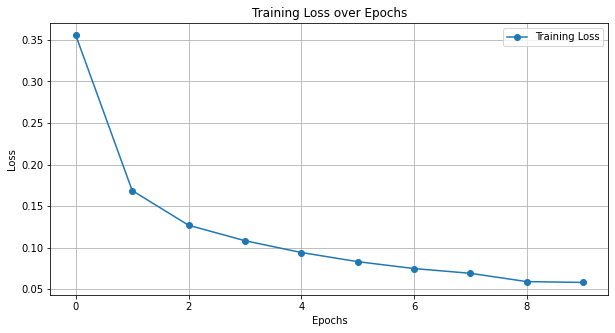

In [13]:
import matplotlib.pyplot as plt

# Training losses from the provided data
train_losses = [0.3553, 0.1687, 0.1270, 0.1084, 0.0942, 0.0832, 0.0749, 0.0692, 0.0592, 0.0582]

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, marker='o', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():  # Disable gradient calculation
    for inputs, targets in test_loader:
        # Move data to the appropriate device
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get the predicted class with the highest probability
        _, predicted = torch.max(outputs.data, 1)
        
        # Update total and correct predictions
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total

# Print the accuracy
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

# Check if accuracy is over 90%
if accuracy > 90:
    print("Model has achieved an accuracy over 90%.")
else:
    print("Model's accuracy is under 90%. Consider reviewing your model architecture, loss function, and optimizer to make improvements.")


Accuracy of the model on the test set: 97.39%
Model has achieved an accuracy over 90%.


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [16]:
# Define a new learning rate and number of epochs
new_learning_rate = 0.0001
new_num_epochs = 20

# Reinitialize the model, loss function, and optimizer
model = SimpleNN()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=new_learning_rate)

# Retrain the model with new hyperparameters
new_train_losses = []

for epoch in range(new_num_epochs):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if batch_idx % 250 == 249:
            print(f'Epoch [{epoch+1}/{new_num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    average_loss = running_loss / len(train_loader)
    new_train_losses.append(average_loss)
    print(f'Epoch [{epoch+1}/{new_num_epochs}], Average Loss: {average_loss:.4f}')

# Evaluate the model again
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

new_accuracy = 100 * correct / total
print(f'New accuracy of the model on the test set: {new_accuracy:.2f}%')

if new_accuracy > 90:
    print("Model has achieved an accuracy over 90%.")
else:
    print("Model's accuracy is under 90%. Consider further tuning your hyperparameters or adjusting the model architecture.")


Epoch [1/20], Batch [250/1875], Loss: 0.9925
Epoch [1/20], Batch [500/1875], Loss: 0.5533
Epoch [1/20], Batch [750/1875], Loss: 0.3452
Epoch [1/20], Batch [1000/1875], Loss: 0.2643
Epoch [1/20], Batch [1250/1875], Loss: 0.4724
Epoch [1/20], Batch [1500/1875], Loss: 0.5268
Epoch [1/20], Batch [1750/1875], Loss: 0.3385
Epoch [1/20], Average Loss: 0.6380
Epoch [2/20], Batch [250/1875], Loss: 0.3009
Epoch [2/20], Batch [500/1875], Loss: 0.8243
Epoch [2/20], Batch [750/1875], Loss: 0.4063
Epoch [2/20], Batch [1000/1875], Loss: 0.2695
Epoch [2/20], Batch [1250/1875], Loss: 0.7757
Epoch [2/20], Batch [1500/1875], Loss: 0.1682
Epoch [2/20], Batch [1750/1875], Loss: 0.0800
Epoch [2/20], Average Loss: 0.3134
Epoch [3/20], Batch [250/1875], Loss: 0.2419
Epoch [3/20], Batch [500/1875], Loss: 0.3285
Epoch [3/20], Batch [750/1875], Loss: 0.1850
Epoch [3/20], Batch [1000/1875], Loss: 0.1710
Epoch [3/20], Batch [1250/1875], Loss: 0.3619
Epoch [3/20], Batch [1500/1875], Loss: 0.2903
Epoch [3/20], Batch

## Saving your model
Using `torch.save`, save your model for future loading.

In [17]:
# Save the trained model
model_path = "mnist_model.pth"
torch.save(model.state_dict(), model_path)
print(f'Model saved to {model_path}')


Model saved to mnist_model.pth
